In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


In [2]:
df = pd.read_csv('./datasets/candy_production.csv')
df.head()

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [3]:
df['observation_date']= pd.to_datetime(df['observation_date'], infer_datetime_format=True)
df_index = df.set_index(['observation_date'])
df_index=df_index['IPG3113N']

In [4]:
df_index.head()

observation_date
1972-01-01    85.6945
1972-02-01    71.8200
1972-03-01    66.0229
1972-04-01    64.5645
1972-05-01    65.0100
Name: IPG3113N, dtype: float64

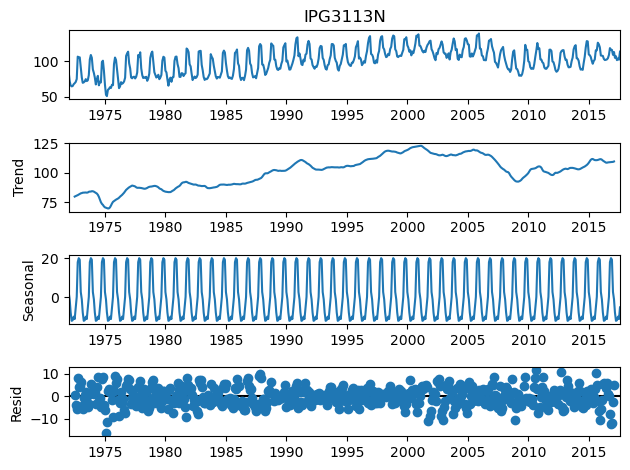

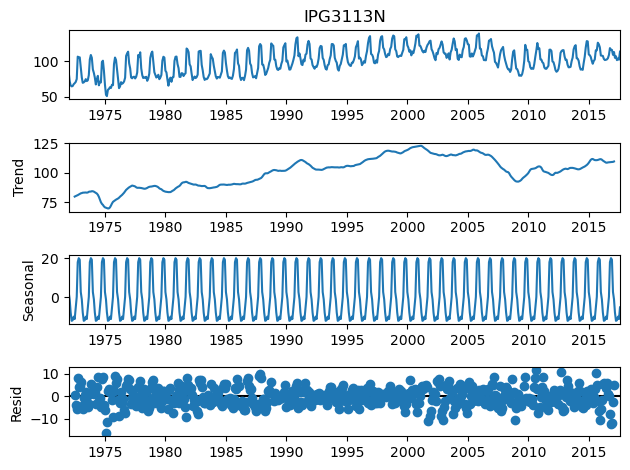

In [5]:
decompose_data = seasonal_decompose(df_index, model='additive')
decompose_data.plot()

In [6]:
def stationarity_test(timeseries_data):
    
    timeseries_data.dropna(inplace= True)
    
    rol_mean = timeseries_data.rolling(window= 12).mean()
    rol_std = timeseries_data.rolling(window = 12).std()

    orig = plt.plot(timeseries_data, label= 'Original')
    mean = plt.plot(rol_mean, label = 'Rolling Mean')
    std = plt.plot(rol_std, label = 'Rolling std')

    plt.legend(loc = 'best')
    plt.title('Time series data with mean and std dev')

    adfuller_test = adfuller(timeseries_data)
    adfuller_test_ouput = pd.Series(adfuller_test[0:4], index = ['Test Statistics', 'Mackinnon"s approximate p-vaue', '#usedLag', 'NOBS'])

    print(adfuller_test_ouput)
    

Test Statistics                    -1.887050
Mackinnon"s approximate p-vaue      0.338178
#usedLag                           14.000000
NOBS                              533.000000
dtype: float64


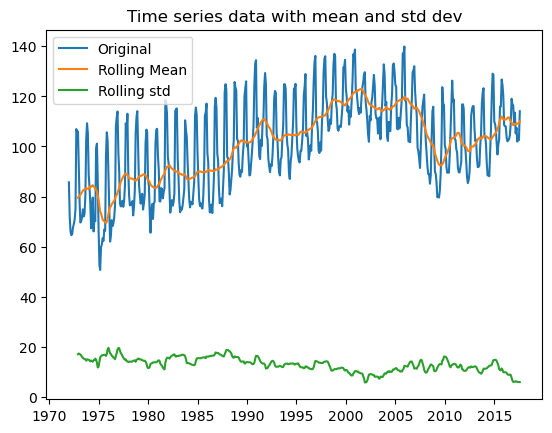

In [7]:
stationarity_test(df_index)

Test Statistics                    -1.841721
Mackinnon"s approximate p-vaue      0.359954
#usedLag                           15.000000
NOBS                              532.000000
dtype: float64


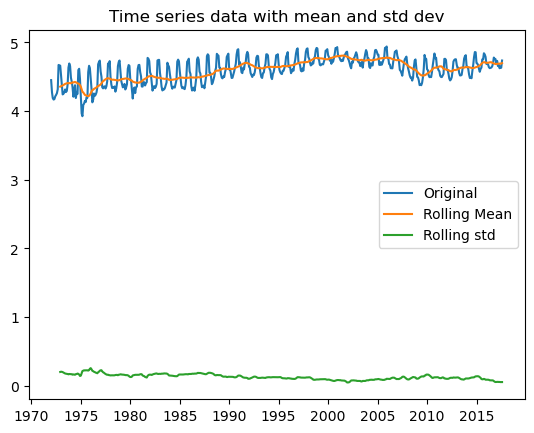

In [8]:
df_index_log_scaled = np.log(df_index)
stationarity_test(df_index_log_scaled)

Test Statistics                  -7.573451e+00
Mackinnon"s approximate p-vaue    2.801611e-11
#usedLag                          1.400000e+01
NOBS                              5.220000e+02
dtype: float64


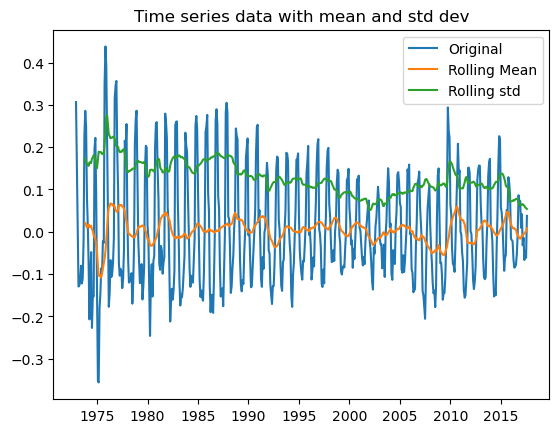

In [9]:
ma = df_index_log_scaled.rolling(window=12).mean()
df_index_log_scaled_minus_ma = df_index_log_scaled-ma

stationarity_test(df_index_log_scaled_minus_ma)